In [4]:
## Function to do Wright-Fisher simulation with selection and a finite sample size
# using priors on Ne, s, and initial allele frequency
# Sample at two time points

# i is a dummy argument so that it can be used with sapply and parSapply
# f1min: the minimum for the initial allele frequency uniform prior
# f1max:
# smin: the minimum for the selection coefficient uniform prior
# smax:
# c1: the size of the first sample (in # chromosomes)
# c2: the size of the second sample (in # chromosomes)
# gen: the number of generations
# ne: a vector of possible Ne values. Simulation picks one to use.
# h: dominance effect
wfs <- function(i, f1min=f1min, f1max=f1max, smin=smin, smax=smax, c1=c1, c2=c2, gen=gen, ne=ne, h=h){ 
	# choose parameters for this simulation
	f1 <- runif(1, min=f1min, max=f1max) # starting allele frequency
	s <- runif(1, min=smin, max=smax) # selection coefficient
	if(length(ne)>1) thisne <- round(sample(ne, 1)) # ne has to be integer for binomial sampling
	if(length(ne)==1) thisne <- round(ne)
	
#	print(paste(f1, s, thisne))
	
	p <- f1 # current allele frequency
	waa <- 1+s # relative fitness of genotype AA
	wab <- 1+s*h
	wbb <- 1
	for(i in 1:gen){
		x <- (waa*p^2 + wab*p*(1-p))/(waa*p^2 + wab*2*p*(1-p) + wbb*(1-p)^2) # probability of sampling allele A, given selection
		p <- rbinom(1,thisne,x)/thisne
#		print(paste(x,p))
	}
	f2 <- p

	f1samp <- rbinom(1,c1,f1)/c1 # first sample allele frequency
	f2samp <- rbinom(1,c2,f2)/c2 # second sample allele frequency

	# calculate summary statistics (Foll et al. 2015 Molecular Ecology Resources)
#	stats <- sumstats(f1samp, f2samp, c1, c2, gen)
	
	# return values
#	out <- c(ne=thisne, f1=f1, s=s, gen=gen, f2=f2, f1samp=f1samp, f2samp=f2samp, fsdprime=stats[1], fsiprime=stats[2])
	out <- c(ne=thisne, f1=f1, s=s, gen=gen, f2=f2, f1samp=f1samp, f2samp=f2samp)
	return(out)
}


In [89]:
data=rep(1,1000)

Run with 0 generations

In [117]:
outputn=lapply(data, wfs, f1min=0.005, f1max=.05, smin=0, smax=0, c1=50, c2=50, gen=1, ne=200, h=0)
outputm=lapply(data, wfs, f1min=0.005, f1max=.05, smin=0, smax=0, c1=25, c2=25, gen=1, ne=50, h=0)
mito=as.data.frame(do.call(rbind, outputm))
mito$diffsamp=abs(mito$f1samp-mito$f2samp)
mito$difffreq=abs(mito$f1-mito$f2)
nuc=as.data.frame(do.call(rbind, outputn))
nuc$diffsamp=abs(nuc$f1samp-nuc$f2samp)
nuc$difffreq=abs(nuc$f1-nuc$f2)

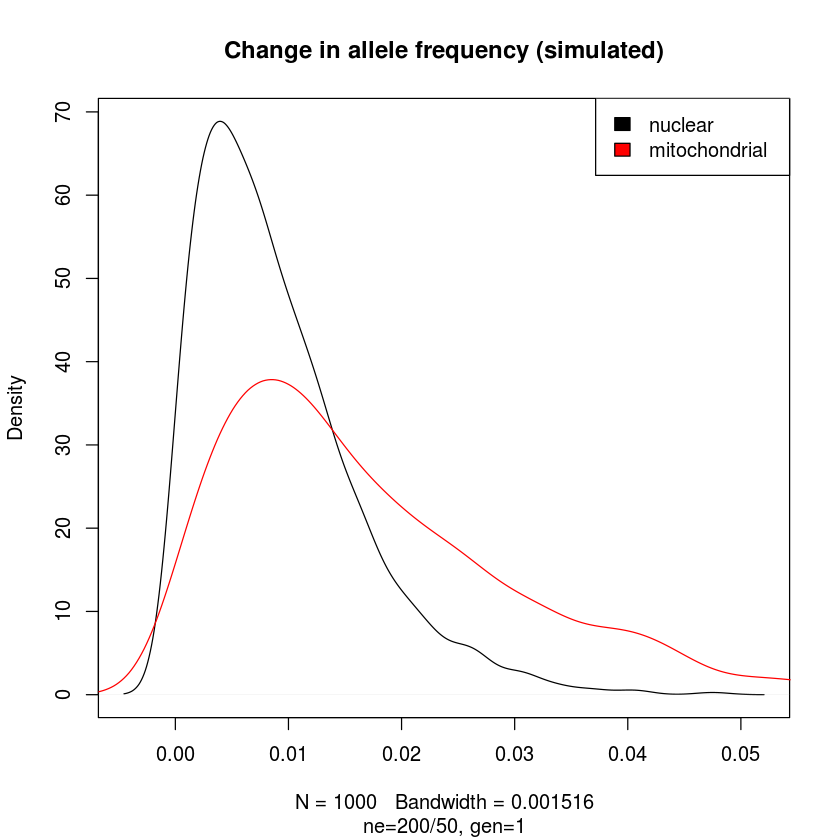

In [118]:
plot(density(nuc$difffreq), main="Change in allele frequency (simulated)", sub="ne=200/50, gen=1")
     lines(density(mito$difffreq), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

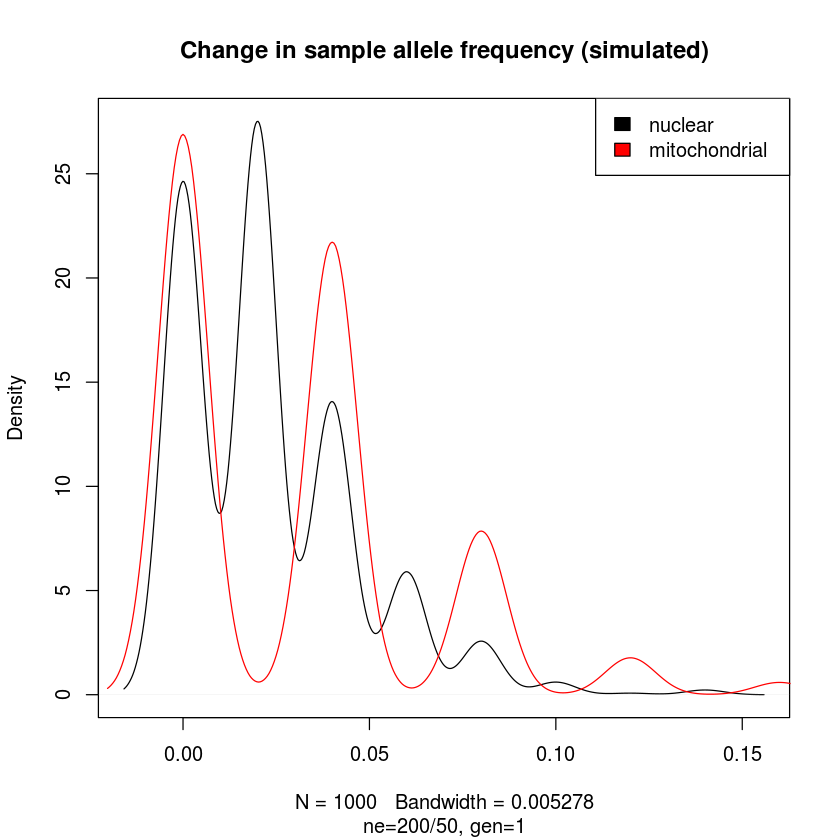

In [119]:
plot(density(nuc$diffsamp), main="Change in sample allele frequency (simulated)", sub="ne=200/50, gen=1")
     lines(density(mito$diffsamp), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

In [86]:
outputn=lapply(data, wfs, f1min=0.05, f1max=0.5, smin=0, smax=0, c1=50, c2=50, gen=0, ne=200, h=0)
outputm=lapply(data, wfs, f1min=0.05, f1max=0.5, smin=0, smax=0, c1=25, c2=25, gen=0, ne=50, h=0)
mito=as.data.frame(do.call(rbind, outputm))
mito$diffsamp=abs(mito$f1samp-mito$f2samp)
mito$difffreq=abs(mito$f1-mito$f2)
nuc=as.data.frame(do.call(rbind, outputn))
nuc$diffsamp=abs(nuc$f1samp-nuc$f2samp)
nuc$difffreq=abs(nuc$f1-nuc$f2)

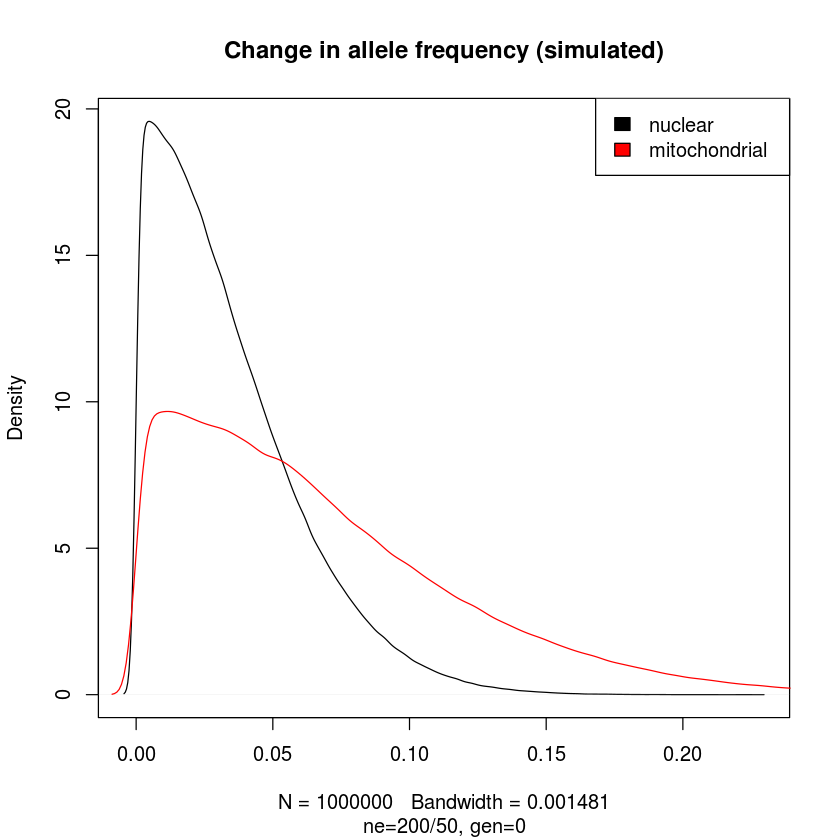

In [87]:
plot(density(nuc$difffreq), main="Change in allele frequency (simulated)", sub="ne=200/50, gen=0")
     lines(density(mito$difffreq), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

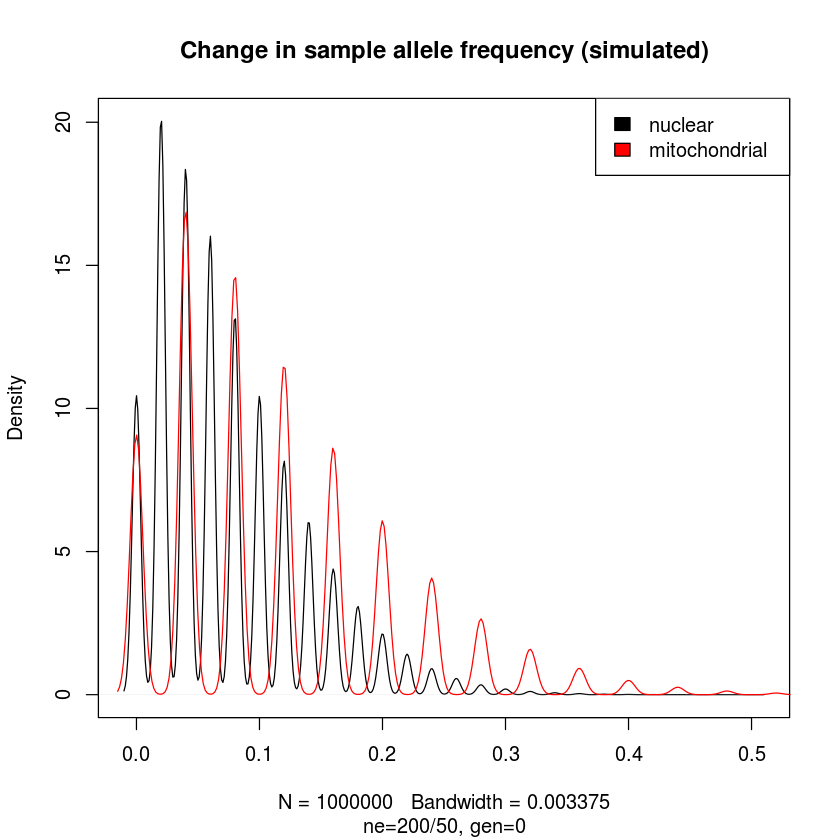

In [88]:
plot(density(nuc$diffsamp), main="Change in sample allele frequency (simulated)", sub="ne=200/50, gen=0")
     lines(density(mito$diffsamp), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

Get genotype probabilities, call a genotype based on the probabilities summ geno probs divide by number of chromosomes. 
Sum of RR+RA+AA/2N= f1samp
Sample the genotype probabilities, calculate f1samp, input that into the wright fisher simulations, then save the output. WE want to know if the allele frequency changes that we are seeing are similar to what we would expect due to drift given our f1samp. 
Do a bunch of times, save all the output. 
At some point we should look to see if our calculated allele frequencies are correct. Do about a million simulations. make sims null will help parallelize it. 
can we fit the null model to a distribution to get the ends. 
bootstrapping?
Look at the bootstrapping for the sfs, to get error bounds on fst or tajima's D? 

In [1]:
genoprobs=read.csv("/local/home/sarahgw/WGS/SNPS/All_mylu/snps/Candidate_SNPs_geno.csv", header=FALSE)

In [3]:
head(genoprobs)

V1       V2      V3       V4       V5       V6       V7       V8      
1 GL429793 3619488 0.272212 0.499055 0.228733 0.272212 0.499055 0.228733
2 GL429805 5255331 0.254753 0.499955 0.245292 0.000051 0.504703 0.495246
3 GL429830 4776068 0.291388 0.496831 0.211781 0.291388 0.496831 0.211781
4 GL429833 4827830 0.294581 0.496344 0.209075 0.000000 0.228837 0.771163
5 GL429835 4132453 0.267540 0.499405 0.233055 0.517222 0.482733 0.000045
6 GL429848 4054536 0.284989 0.497709 0.217302 0.533824 0.466135 0.000041
  V9       V10      ⋯ V390     V391     V392     V393     V394     V395    
1 0.685719 0.314281 ⋯ 0.272212 0.499055 0.228733 0.272212 0.499055 0.228733
2 0.254753 0.499955 ⋯ 0.504708 0.495243 0.000049 0.670862 0.329138 0.000000
3 0.291388 0.496831 ⋯ 0.291388 0.496831 0.211781 0.291388 0.496831 0.211781
4 0.542734 0.457227 ⋯ 0.000000 0.129200 0.870800 0.703620 0.296380 0.000000
5 0.267540 0.499405 ⋯ 0.517152 0.482669 0.000179 0.267540 0.499405 0.233055
6 0.000061 0.533809 ⋯ 0.284989 0.497709 0.217302 0.000077 0.533800 0.466123
  V396     V397     V398     V399
1 0.272212 0.499055 0.228733 NA  
2 0.000163 0.504646 0.495191 NA  
3 0.539785 0.460176 0.000039 NA  
4 0.542734 0.457227 0.000039 NA  
5 0.267540 0.499405 0.233055 NA  
6 0.533818 0.466130 0.000051 NA

In [5]:
samples=read.table("/local/home/sarahgw/WGS/Sequences/filelists/All_Mylu.filelist", header=FALSE)

In [6]:
print(samples)

                                     V1
1   NJ_E_01_pairedplus_marked_dupes.bam
2   NJ_E_02_pairedplus_marked_dupes.bam
3   NJ_E_04_pairedplus_marked_dupes.bam
4   NJ_E_23_pairedplus_marked_dupes.bam
5   NJ_E_24_pairedplus_marked_dupes.bam
6   NJ_E_25_pairedplus_marked_dupes.bam
7   NJ_E_26_pairedplus_marked_dupes.bam
8   NJ_E_28_pairedplus_marked_dupes.bam
9   NJ_E_29_pairedplus_marked_dupes.bam
10  NJ_E_30_pairedplus_marked_dupes.bam
11  NJ_E_05_pairedplus_marked_dupes.bam
12  NJ_E_06_pairedplus_marked_dupes.bam
13  NJ_E_07_pairedplus_marked_dupes.bam
14  NJ_E_08_pairedplus_marked_dupes.bam
15  NJ_E_10_pairedplus_marked_dupes.bam
16  NJ_E_22_pairedplus_marked_dupes.bam
17  NJ_E_13_pairedplus_marked_dupes.bam
18  NJ_E_14_pairedplus_marked_dupes.bam
19  NJ_E_15_pairedplus_marked_dupes.bam
20  NJ_E_16_pairedplus_marked_dupes.bam
21  NJ_E_18_pairedplus_marked_dupes.bam
22  NJ_E_21_pairedplus_marked_dupes.bam
23  NJ_U_01_pairedplus_marked_dupes.bam
24  NJ_U_02_pairedplus_marked_dupes.bam


In [2]:
# 23 - 42
NJU_genoprobs=genoprobs[,69:128] 
# 64 - 85
NYU_genoprobs=genoprobs[,192:257] 
# 113 - 132
VTU_genoprobs=genoprobs[,339:398]

In [3]:
NCOL(NJU_genoprobs)
NCOL(NYU_genoprobs)
NCOL(VTU_genoprobs)

[1] 60

[1] 66

[1] 60

In [9]:
head(NJU_genoprobs)

V69      V70      V71      V72      V73      V74      V75      V76     
1 0.521713 0.478232 0.000055 0.272212 0.499055 0.228733 0.685719 0.314281
2 0.890748 0.109252 0.000000 0.000000 0.999608 0.000392 0.254753 0.499955
3 0.539779 0.460171 0.000049 0.291388 0.496831 0.211781 0.291388 0.496831
4 0.000237 0.999594 0.000168 0.294581 0.496344 0.209075 0.542734 0.457227
5 0.267540 0.499405 0.233055 0.000677 0.998734 0.000589 0.000000 0.211264
6 0.533791 0.466107 0.000102 0.000229 0.999596 0.000175 0.000000 0.998609
  V77      V78      ⋯ V119     V120     V121     V122     V123     V124    
1 0.000000 0.272212 ⋯ 0.000000 0.272212 0.499055 0.228733 0.521719 0.478237
2 0.245292 0.803015 ⋯ 0.000196 0.000065 0.504696 0.495239 0.000163 0.504646
3 0.211781 0.291388 ⋯ 0.872130 0.291388 0.496831 0.211781 0.000000 0.226748
4 0.000039 0.904729 ⋯ 0.000000 0.000081 0.542707 0.457212 0.904729 0.095271
5 0.788736 0.267540 ⋯ 0.482717 0.267540 0.499405 0.233055 0.000000 0.348834
6 0.001391 0.533777 ⋯ 0.000041 0.284989 0.497709 0.217302 0.000915 0.999085
  V125     V126     V127     V128    
1 0.000044 0.521713 0.478232 0.000055
2 0.495191 0.000204 0.999600 0.000196
3 0.773252 0.000295 0.999490 0.000215
4 0.000000 0.294581 0.496344 0.209075
5 0.651166 0.000175 0.517150 0.482675
6 0.000000 0.284989 0.497709 0.217302

Turn this into a function so you can repeat it and specify which population you want to use. 
Run it with malin's funciton, fill in the actual size of populations. Get the sample allele freq for Exposed population, compare to what you have. 
Compare your actual minor allele frequencies to these ones. 
I'm confused how I have genotype probabilities for samples where I didnt think we had coverage???
Figure out how to display the distribution of input the allele frequencies--Maybe just plot the change? as density?

In [90]:
##Loop through differnet snps in output from angsd
#take groups of three probabilities and use that to sample from possible genotypes
#count number of times minor allele is found, divide by N*2 
#populate f1samps dataframe to feed to wfs by samp

gp2af=function(POP_genoprobs){ 
genos=c("0", "1", "2")
genosamp=character(0)
f1samps=data.frame(0)
genosamp=vector()
for (j in 1:NROW(POP_genoprobs)){
    v=as.vector(POP_genoprobs[j,])
    for(i in seq(1,length(v),3)){
        three_probs=v[i:(i+2)]
        genosamp[i]=sample(genos, size = 1, prob=three_probs)
        genosamp=as.numeric(as.character(genosamp)) 
        f1samps[j,]=(sum(genosamp, na.rm=TRUE))/(2*(length(v)/3))
         }} 
    return(f1samps)
}

In [88]:
gp2af=function(POP_genoprobs){ 
genos=c("0", "1", "2")
genosamp=character(0)
f1samps=data.frame(0)
genosamp=vector()
for (j in 1:NROW(POP_genoprobs)){
    v=as.vector(POP_genoprobs[j,])
    
    gp2afi=function(v){
        for(i in seq(1,length(v),3)){
            three_probs=v[i:(i+2)]
            genosamp[i]=sample(genos, size = 1, prob=three_probs)
            genosamp=as.numeric(as.character(genosamp)) 
            f1samps[j,]=(sum(genosamp, na.rm=TRUE))/(2*(length(v)/3))
             }
        } 
    
    return(f1samps)
}

ERROR: Error in parse(text = x, srcfile = src): <text>:20:0: unexpected end of input
18:     return(f1samps)
19: }
   ^


In [133]:
gp2afi=function(v){
    f1samps=vector()
    genosamp=vector()
    genos=c("0", "1", "2")
    for(i in seq(1,length(v),3)){
        three_probs=v[i:(i+2)]
            genosamp[i]=sample(genos, size = 1, prob=three_probs)
            genosamp=as.numeric(as.character(genosamp)) 
            f1samps=(sum(genosamp, na.rm=TRUE))/(2*(length(v)/3))          
    }  
    return(f1samps)
}

In [136]:
apply(NJU_genoprobs, 1, gp2afi)

[1] 0.425 0.500 0.450 0.500 0.625 0.525 0.325 0.400 0.575 0.450

In [135]:
test=as.vector(NJU_genoprobs[1,])

gp2afi(test)

[1] 0.55

In [107]:
test

V69      V70      V71     V72      V73      V74      V75      V76      V77
1 0.521713 0.478232 5.5e-05 0.272212 0.499055 0.228733 0.685719 0.314281 0  
  V78      ⋯ V119 V120     V121     V122     V123     V124     V125    V126    
1 0.272212 ⋯ 0    0.272212 0.499055 0.228733 0.521719 0.478237 4.4e-05 0.521713
  V127     V128   
1 0.478232 5.5e-05

In [14]:
v=as.vector(NJU_genoprobs[2,])
genos=c("0", "1", "2")
f1samps=data.frame(0)
genosamp=vector()
test=function(i){
    { for(i in seq(1,length(v),3)){
        three_probs=v[i:(i+2)]
        genosamp[i]=sample(genos, size = 1, prob=three_probs)
        genosamp=as.numeric(as.character(genosamp)) 
        f1samps[1,]=(sum(genosamp, na.rm=TRUE))/(2*(length(v)/3))
         }} }

In [53]:
system.time(replicate(10, gp2af(NJU_genoprobs)))

   user  system elapsed 
  0.442   0.000   0.443 

In [140]:
system.time(replicate(1000, apply(NJU_genoprobs, 1, gp2afi)))

   user  system elapsed 
  9.161   0.000   9.158 

In [19]:

three_probs=v[1:(1+2)]
system.time(replicate(1000, sample(genos, size = 1, prob=three_probs)))

   user  system elapsed 
  0.014   0.000   0.014 

In [38]:
f1samps

X0   
1  0.500
2  0.450
3  0.475
4  0.450
5  0.575
6  0.550
7  0.275
8  0.575
9  0.500
10 0.375

In [5]:
## Function to do Wright-Fisher simulation with selection and a finite sample size
# using priors on Ne and s
# and specify initial sample allele frequency, f1samp (compare to wfs.r, which sets a prior on initial true allele freq f1)
# Sample at two time points

# f1samp: the initial sample allele frequency. Initial true allele freq will be sampled with this constraint.
# smin: the minimum for the selection coefficient uniform prior
# smax:
# c1: the size of the first sample (in # chromosomes)
# c2: the size of the second sample (in # chromosomes)
# gen: the number of generations
# ne: a vector of possible Ne values. Simulation picks one to use.
# h: dominance effect

wfs_byf1samp <- function(f1samp=0.5, smin=-1, smax=1, c1=58, c2=48, gen=20, ne=100, h=0.5){ 
	tol <- .Machine$double.eps^0.5 # tolerane for equality. default tolerance in all.equal

	# make sure f1samp is possible given initial sample size (c1)
	# test whether difference from a possible sample size is less than tol
	if(!any(abs(f1samp - ((0:c1)/c1)) < tol)) return(NA)
        #stop(paste('f1samp=', f1samp, 'not possible given c1=', c1))

	# choose parameters for this simulation
		s <- runif(1, min=smin, max=smax) # selection coefficient
	if(length(ne)>1) thisne <- round(sample(ne, 1)) # ne has to be integer for binomial sampling
	if(length(ne)==1) thisne <- round(ne)

	# choose initial population frequency
	# brute force method: keep picking possible f1s until one produces the correct f1samp
	thisf1 <- -100
	while(abs(thisf1 - f1samp) >= tol){
		f1 <- runif(1, min=0, max=1) # pick a starting allele frequency
		thisf1 <- rbinom(1,c1,f1)/c1 # pick a first sample allele frequency that corresponds
	}
	
#	print(paste(f1, s, thisne))
	
	p <- f1 # current allele frequency
	waa <- 1+s # relative fitness of genotype AA
	wab <- 1+s*h
	wbb <- 1
	for(i in 1:gen){
		x <- (waa*p^2 + wab*p*(1-p))/(waa*p^2 + wab*2*p*(1-p) + wbb*(1-p)^2) # probability of sampling allele A, given selection
		p <- rbinom(1,thisne,x)/thisne
#		print(paste(x,p))
	}
	f2 <- p

	f2samp <- rbinom(1,c2,f2)/c2 # second sample allele frequency

	# calculate summary statistics (Foll et al. 2015 Molecular Ecology Resources)
#	stats <- sumstats(f1samp, f2samp, c1, c2, gen)
	
	# return values
#	out <- c(ne=thisne, f1=f1, s=s, gen=gen, f2=f2, f1samp=f1samp, f2samp=f2samp, fsdprime=stats[1], fsiprime=stats[2])
	#out <- c(ne=thisne, f1=f1, s=s, gen=gen, f2=f2, f1samp=f1samp, f2samp=f2samp)
	out=f2samp
        return(out)
}




In [44]:
NYU_f1samp=as.data.frame(replicate(10, gp2af(NYU_genoprobs)))
#NJU_f1samp=as.data.frame(replicate(100, gp2af(NJU_genoprobs)))
#VTU_f1samp=as.data.frame(replicate(100, gp2af(VTU_genoprobs)))

ERROR: Error in system.time(NYU_f1samp = as.data.frame(replicate(10, gp2af(NYU_genoprobs)))): unused argument (NYU_f1samp = as.data.frame(replicate(10, gp2af(NYU_genoprobs))))


In [19]:
NYE_f2samp=apply(NYU_f1samp, c(1,2), wfs_byf1samp, smin=0, smax=0, c1=44, c2=40, gen=1, ne=100, h=0)
NJE_f2samp=apply(NJU_f1samp, c(1,2), wfs_byf1samp, smin=0, smax=0, c1=40, c2=44, gen=1, ne=100, h=0)
VTE_f2samp=apply(VTU_f1samp, c(1,2), wfs_byf1samp, smin=0, smax=0, c1=40, c2=54, gen=1, ne=100, h=0)

In [16]:
NYdiff=NYE_f2samp-NYU_f1samp
NYdiff=apply(NYdiff, c(1,2), as.numeric)

VTdiff=VTE_f2samp-VTU_f1samp
VTdiff=apply(VTdiff, c(1,2), as.numeric)

NJdiff=NJE_f2samp-NJU_f1samp
NJdiff=apply(NJdiff, c(1,2), as.numeric, as.character)

ERROR: Error in eval(expr, envir, enclos): object 'VTE_f2samp' not found


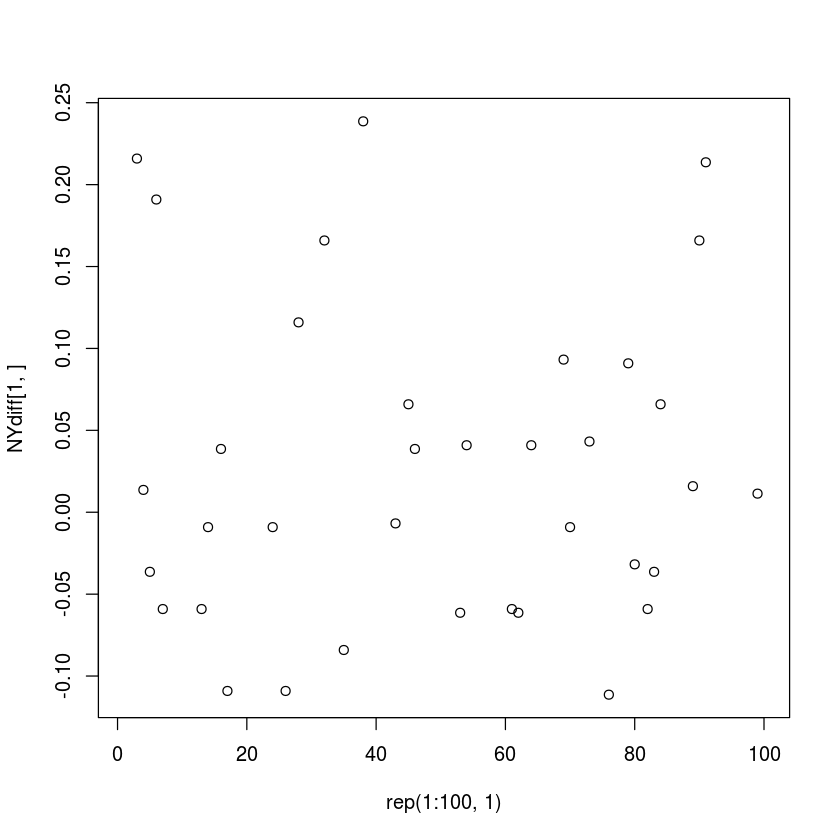

In [17]:
plot(rep(1:100,1), NYdiff[1,])

In [313]:
NJdiff

X0           X0.1         X0.2  X0.3        X0.4        X0.5       
 [1,]  0.006818182 -0.036363636    NA          NA          NA          NA
 [2,]           NA           NA 0.025  0.16818182          NA          NA
 [3,] -0.222727273           NA    NA          NA          NA          NA
 [4,]           NA           NA    NA          NA 0.120454545  0.10000000
 [5,]           NA           NA    NA          NA          NA          NA
 [6,]  0.236363636           NA    NA          NA          NA -0.01363636
 [7,]           NA           NA    NA -0.01363636 0.009090909          NA
 [8,]           NA -0.177272727    NA  0.04318182          NA          NA
 [9,]           NA  0.047727273    NA          NA          NA          NA
[10,]           NA  0.004545455    NA          NA          NA          NA
      X0.6         X0.7         X0.8        X0.9        X0.10       
 [1,]           NA -0.104545455          NA          NA -0.056818182
 [2,]  0.009090909 -0.104545455  0.14318182 -0.01363636 -0.129545455
 [3,]           NA           NA -0.01590909          NA           NA
 [4,]           NA -0.290909091          NA          NA           NA
 [5,] -0.043181818           NA  0.04772727          NA           NA
 [6,]           NA -0.011363636          NA          NA           NA
 [7,]  0.100000000  0.009090909  0.07500000 -0.19318182           NA
 [8,]           NA  0.068181818          NA          NA           NA
 [9,]           NA  0.047727273          NA          NA  0.004545455
[10,] -0.059090909           NA          NA          NA  0.029545455
      X0.11       X0.12      X0.13        X0.14      
 [1,] -0.03863636         NA           NA -0.08181818
 [2,]          NA         NA           NA          NA
 [3,]  0.07500000         NA -0.313636364          NA
 [4,]          NA -0.1545455 -0.106818182 -0.15000000
 [5,]          NA         NA           NA          NA
 [6,]          NA         NA           NA          NA
 [7,]          NA         NA  0.009090909          NA
 [8,]          NA         NA           NA  0.02045455
 [9,]          NA         NA           NA          NA
[10,] -0.01590909         NA           NA          NA

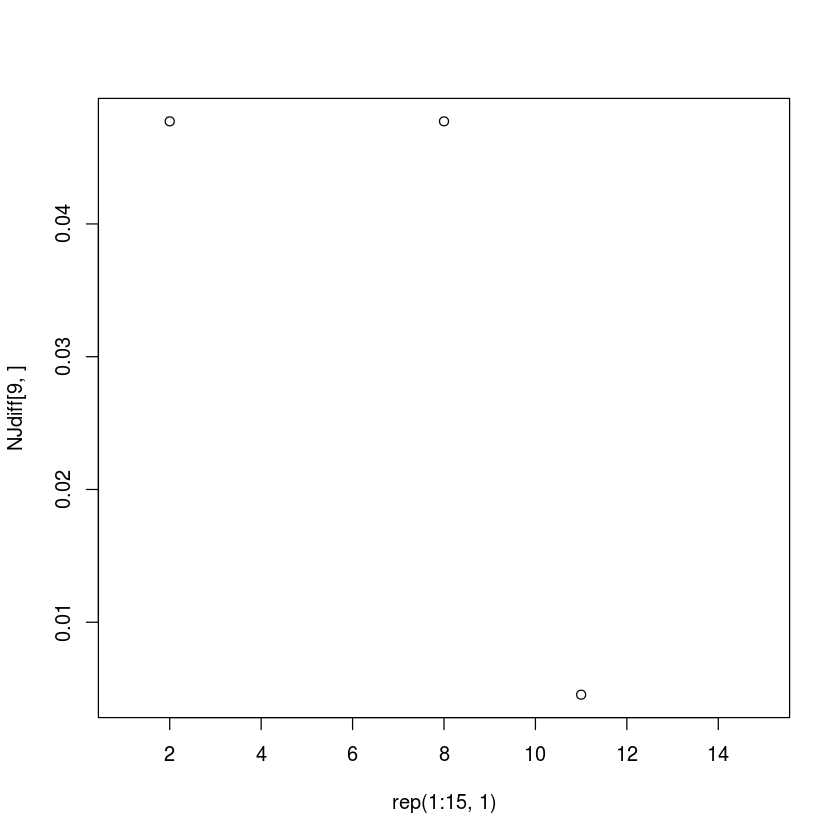

In [316]:
plot(rep(1:15,1), NJdiff[9,])

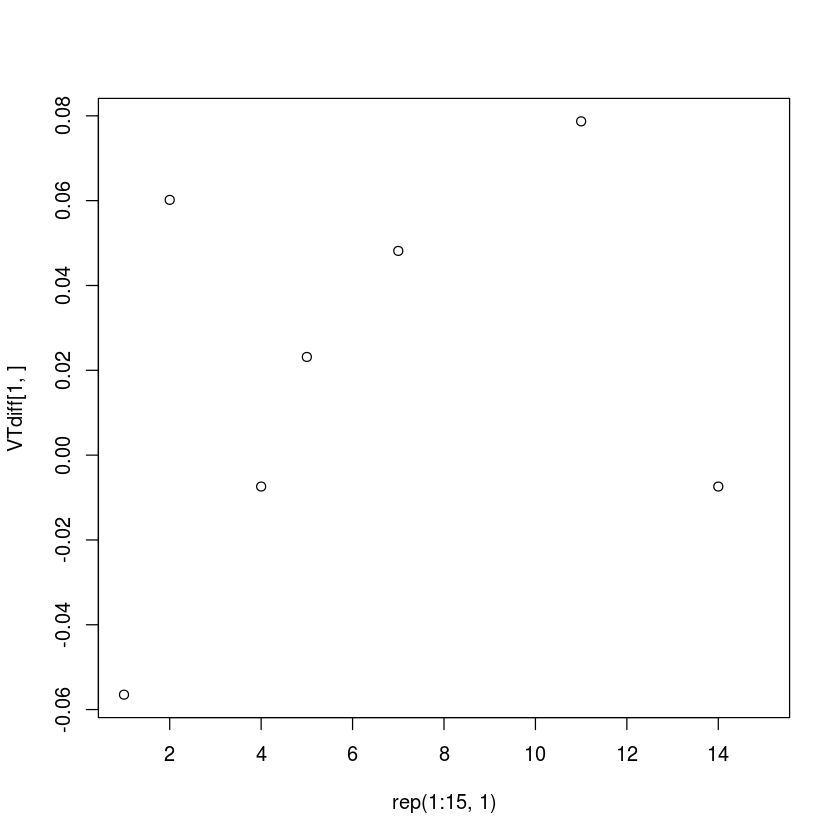

In [310]:
plot(rep(1:15,1), VTdiff[1,])

Choose a genotype based on the geno probs
iinput the sample allele frequency into the simulation
calculate f2 
use that to calculate sample allele frequency, does this match what we actually see
DO THIS FOR THE SNPS of interest. 
Test on some that arent outliers. 


Questions:
Do I need to repeate wfs as well? or is picking new genotypes each time enough replication?
Should we worry about how often we have a sample allele frequency that isn't possible with the size of the populations? Am I missing something in terms of correcting for this?

Again, how to account for 3 populations, I can take average but they don't necessarily line up.

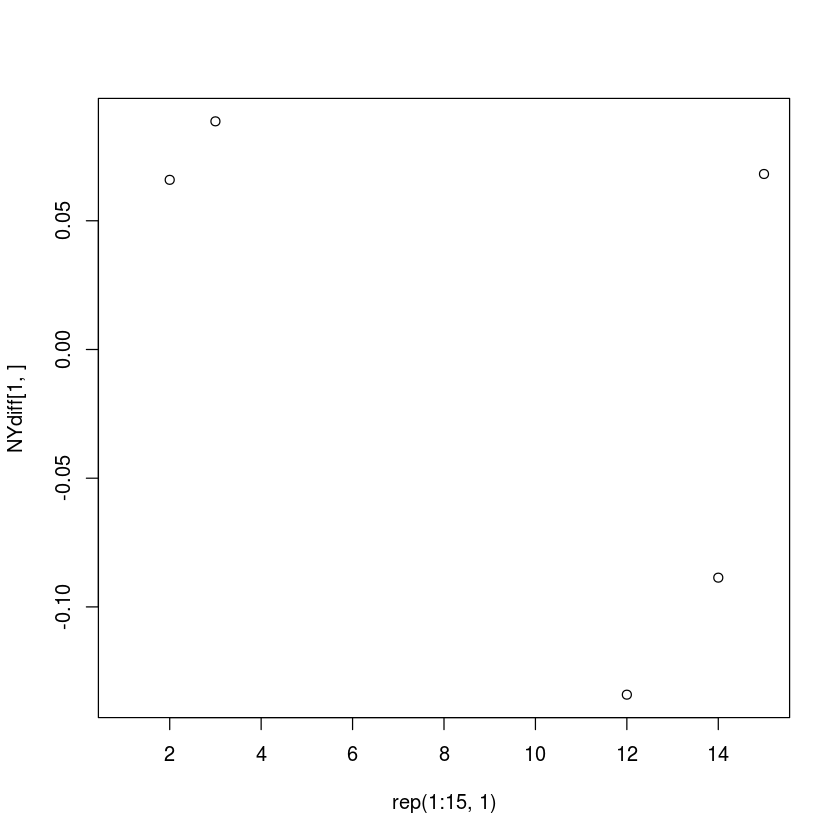

In [ ]:
NCOL